In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, f_classif, chi2, SelectKBest, SelectFpr
import scipy.stats as sp
import matplotlib.pyplot as plt # plotting
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support


# Step 1- Business Understanding 
       Full explanation of step 1 found in the report.
       After performing step 1- Business Understanding in front of the customer.
       We will move on to the next step.
       

# Step 2 - Data Understanding

In this step we definition of type of data to be collected , Learn the data and its significance to the business problem , Data collection, Data repository, Verify quality.

This phase also has four tasks:
1. Collect initial data: Acquire the necessary data and (if necessary) load it into your analysis tool. 
2. Describe data: Examine the data and document its surface properties like data format, number of records, or field identities.
3. Explore data: Dig deeper into the data. Query it, visualize it, and identify relationships among the data. 
4. Verify data quality: How clean/dirty is the data? Document any quality issues.

# 2.1.   Gathering data - upload data set: Insurance company
    Preliminary data collection - we will upload the data needed for our analysis tool

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/insurance-company/Description.pdf
/kaggle/input/insurance-company/Customer_data.csv


In [3]:
df = pd.read_csv('/kaggle/input/insurance-company/Customer_data.csv')

# 2.2. Describing data: 
    Examining the existing data and documenting their surface properties
    Exploration of dataset structure and description 

    A description of the dataset lists the attributes and their descriptions:

Client Attributes: 
* TARGET - Y - Indicator of buying the new product (0 = no, 1=yes)
* loyalty - Loyalty level, from low to high (0 to 3), 99 =unclassified
* ID - Unique customer identifier (numeric)
* age - Age in years (numeric)
* city - Unique code per city (numeric)
* LOR - Length of relationship in years (numeric)
* prod_A - Bought product A (0= no, 1=yes)
* type_A - Type of product A (numeric)
* type_B - Type of product B (numeric)
* prod_B - Bought product B (0= no, 1=yes)
* turnover_A - Amount of money spent on product A (numeric)
* turnover_B - Amount of money spent on product B (numeric)
* contract - Type of contract (numeric)
* age_P - Age of partner in years (numeric)
* lor_M - Length of relationship in months (numeric)

* dataset head : 


In [4]:
df.head(7)

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
5,Y,3,340,24,2,1,1,3,3,1,460.442339,247.467516,2,24,15
6,Y,99,353,57,2,0,0,0,0,0,494.463651,215.976127,2,57,3


* Dataset shape:

In [5]:
row_num, col_num = df.shape
print(f' dataset have: {col_num} columns and {row_num} rows')
print(f' dataset size: {df.size}')

 dataset have: 15 columns and 14016 rows
 dataset size: 210240


* Datatypes of futures in dataset:

In [6]:
df.dtypes

TARGET         object
loyalty         int64
ID              int64
age             int64
city            int64
LOR             int64
prod_A          int64
type_A          int64
type_B          int64
prod_B          int64
turnover_A    float64
turnover_B    float64
contract        int64
age_P           int64
lor_M           int64
dtype: object

In [7]:
df.dtypes.groupby(df.dtypes).size()

int64      12
float64     2
object      1
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


# 2.3. Exploring data
    We will deepen our understanding of the data:
* Statistics on each feature
* Understanding the behavior of the features
* Distribution of data
* Visualization
* Graphs
* understand features connections
* correlation
* Rising / falling trends of pizzerias 
    

In [9]:

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loyalty,14016.0,50.381778,48.471790,0.000000,2.000000,3.000000,99.000000,99.000000
ID,14016.0,37672.440068,44855.639209,1.000000,6741.500000,13514.500000,62738.000000,151811.000000
age,14016.0,35.882920,12.974634,5.000000,25.000000,33.000000,43.000000,102.000000
city,14016.0,-710.950128,26702.329184,-999999.000000,2.000000,2.000000,2.000000,235.000000
LOR,14016.0,0.926299,0.965212,0.000000,0.000000,1.000000,1.000000,6.000000
prod_A,14016.0,0.533818,0.498873,0.000000,0.000000,1.000000,1.000000,1.000000
type_A,14016.0,1.607877,1.508991,0.000000,0.000000,3.000000,3.000000,6.000000
type_B,14016.0,1.918878,1.686038,0.000000,0.000000,3.000000,3.000000,9.000000
prod_B,14016.0,0.599458,0.490026,0.000000,0.000000,1.000000,1.000000,1.000000
turnover_A,14016.0,379.161320,92.612207,300.095909,334.919412,367.891493,399.744923,5568.784139


Preliminary insights from looking at the statistics (treatment below):
- Loyalty - Given that the possible values is 0,1,2,3. Or 99 it and undefined. Can not see that the average for this column is 50 which is quite high for such numbers (computers for loyalty are defined). I will examine this later.
- City - The average value is negative. In addition, the minimum value appears to be 99-. Apparently there is a mistake there. I will diagnose later.
- Cycle_A, Cycle_B - The average of both is around 300, while the maximum value is much larger.
- Contact - seems to be the same for all records. Maybe I'll give it up later.
- age_P - has the same values as age. Maybe unnecessary. 

# Understanding features behavior, distribution, visualization:

* # TARGET :
predict varieble - whether a customer will buy the new product or not

In [10]:
df['TARGET'].dtypes

dtype('O')

In [11]:
# convert TARGET to binary value  - int 
df['TARGET'] = df['TARGET'].map({'Y': 1, 'N': 0})

In [12]:
df.groupby('TARGET').describe()

loyalty                                                        ID  \
         count       mean        std  min  25%   50%   75%   max   count   
TARGET                                                                     
0       8000.0  39.791625  47.226423  0.0  2.0   3.0  99.0  99.0  8000.0   
1       6016.0  64.464428  46.485251  1.0  3.0  99.0  99.0  99.0  6016.0   

                      ... age_P          lor_M                             \
                mean  ...   75%    max   count       mean        std  min   
TARGET                ...                                                   
0        8366.446750  ...  40.0  102.0  8000.0  15.976500  10.605589  3.0   
1       76643.175864  ...  47.0  102.0  6016.0  11.640957  12.339938  3.0   

                                
         25%   50%   75%   max  
TARGET                          
0       15.0  15.0  15.0  75.0  
1        3.0   3.0  15.0  63.0  

[2 rows x 112 columns]

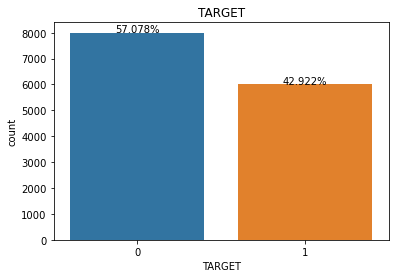

In [13]:
ax = sns.countplot(x="TARGET", data=df)
plt.title('TARGET')

total = len(df['TARGET'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

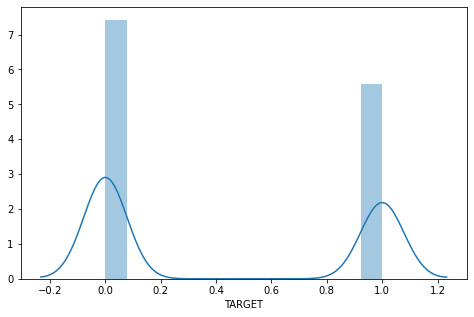

In [14]:
# Distribution
plt.figure(figsize=(8, 5))
sns.distplot(df['TARGET'])

* # ID :
Unique customer identifier

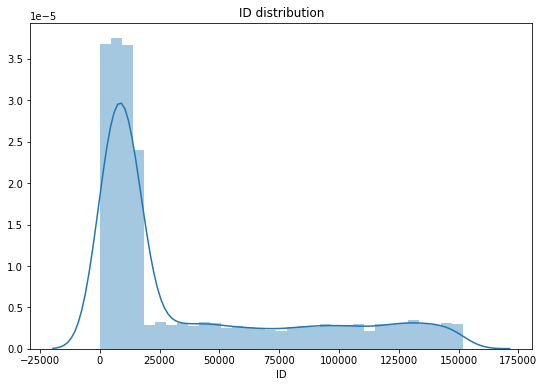

In [15]:
# Distribution
plt.figure(figsize=(9, 6))
plt.title('ID distribution')
sns.distplot(df['ID'])

we can see the most IDs are in the range of low numbers.
Mabey we can say our data is took on peaple who were the first to join the company and are more loyal. 

In [16]:
df_check_under = df[(df['ID'] < 25000)]
print("IDs lower then 25000: ",'{:1.3f}%'.format(100* len(df_check_under)/len(df)))


IDs lower then 25000:  64.055%


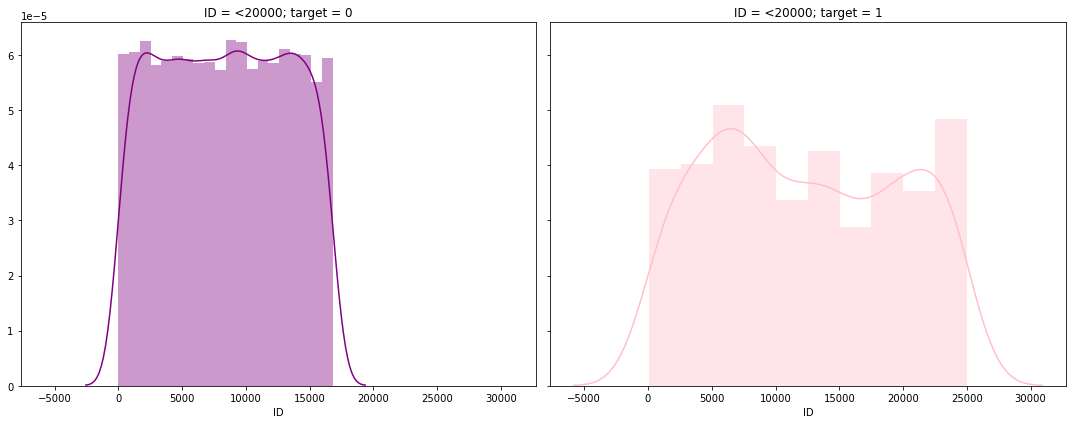

In [17]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6), sharey=True,sharex=True)

ax1=sns.distplot(df_check_under[df_check_under['TARGET'] == 0]['ID'], ax=ax1,color='purple').set_title('ID = <20000; target = 0')
ax2=sns.distplot(df_check_under[df_check_under['TARGET'] == 1]['ID'], ax=ax2,color='pink').set_title('ID = <20000; target = 1')
fig.tight_layout()

* # Age :
Age in years

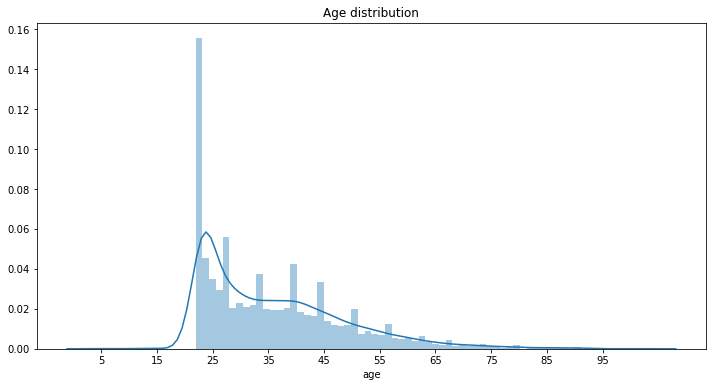

In [18]:
# Distribution
fig = plt.figure(figsize=(12, 6))
sns.distplot(df['age'],bins=80)
plt.xticks(np.arange(min(df['age']), max(df['age'])+1, 10))
plt.title('Age distribution')
plt.show()


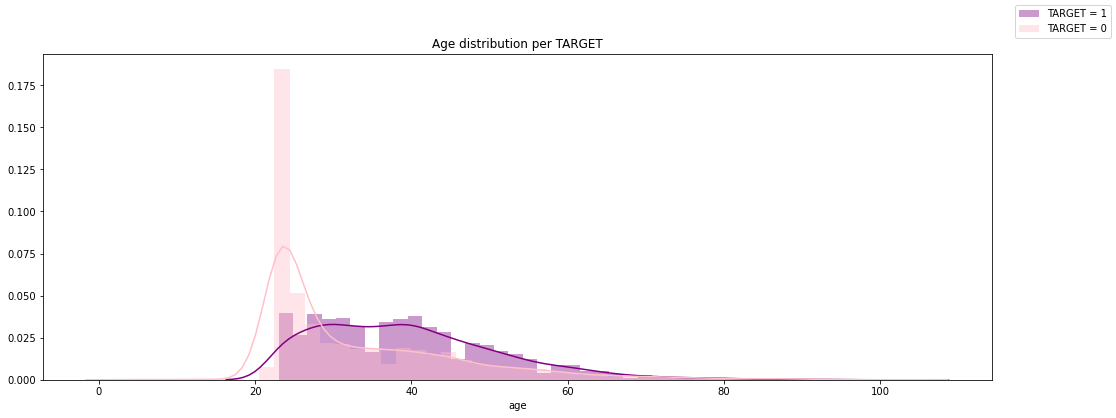

In [19]:
target_zero = df[df['TARGET'] == 0]
target_one = df[df['TARGET'] == 1]

fig = plt.figure(figsize=(17, 6))
sns.distplot(target_one['age'], color='purple')
sns.distplot(target_zero['age'], color='pink')
fig.legend(labels=['TARGET = 1', 'TARGET = 0'])
plt.title('Age distribution per TARGET')
plt.show()
fig.tight_layout()

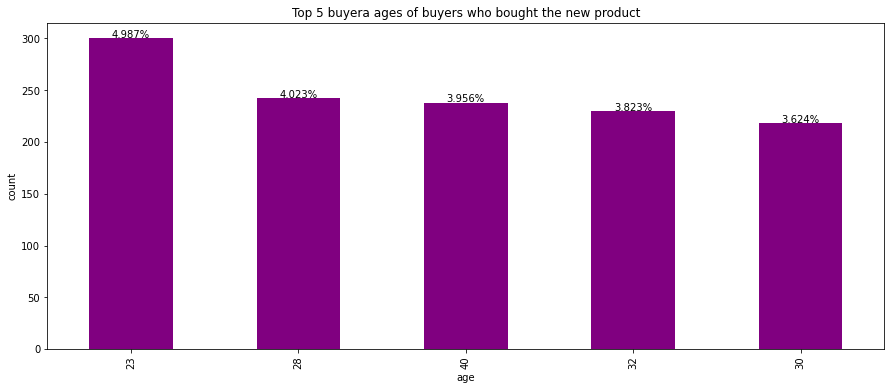

In [20]:
fig = plt.figure(figsize=(15, 6))
ax = df[df['TARGET'] == 1]['age'].value_counts().head(5).plot(kind='bar',color='purple')
total = len(df[df['TARGET'] == 1]['age'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.5,
            '{:1.3f}%'.format(100*(height/total)), ha="center")

plt.title('Top 5 buyera ages of buyers who bought the new product')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

In [21]:
print("common age value: "+str(df['age'].mode()[0]))
print("mean age: "+str(np.round(df['age'].mean(), decimals=2)))
# print("common age value for TARGET=1: "+str(np.round(df[df['TARGET']==1]['age'].mode()[0])))
print("mean age for buying new product (TARGET=1): "+str(np.round(df[df['TARGET']==1]['age'].mean(), decimals=2)))
print("mean age for buying new product (TARGET=0): "+str(np.round(df[df['TARGET']==0]['age'].mean(), decimals=2)))


common age value: 23
mean age: 35.88
mean age for buying new product (TARGET=1): 39.68
mean age for buying new product (TARGET=0): 33.03


We can see that most sampals are 23 years old and for most of them TARGET=0, that means that they dont buy the new prodect. 
The mean age for customres who buy the new product is : 39.7

* # loyalty :
Loyalty level, from low to high (0 - 3), 99 =unclassified

In [22]:
# Exaploring unqie values of loyalty column
df['loyalty'].value_counts()

99    6986
3     3069
1     2480
2     1425
0       56
Name: loyalty, dtype: int64

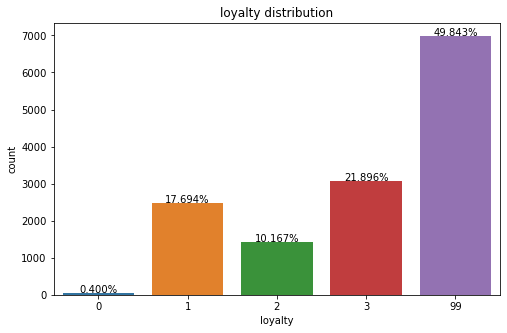

In [23]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="loyalty", data=df)
plt.title('loyalty distribution')

total = len(df['loyalty'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

From the data we got, the possible values for loyalty are: 0,1,2,3, 99 (unclassified).
We can see that there are almost 50% records with "loyalty"=99 means unclassified.
Its large amount, so we will consider later whether to give up this feature. 

* # city :
Unique code per city

In [24]:
print("common city value: "+str(df['city'].mode()[0]))
print("mean city: "+str(np.round(df['city'].mean(), decimals=2)))
print("num of samples that city=2 : "+str((df.city == 2).sum()))
city_precentage_appearance = (df.groupby('city').size()/df['city'].count())*100
city_2_prec = city_precentage_appearance[2]
print("percentage of city=2 : "+ str("%.2f" % city_2_prec)+"%")

print("mean value is: -710.95")
print("that is because the number of city=-999999 is : "+str((df.city == (-999999)).sum()))

common city value: 2
mean city: -710.95
num of samples that city=2 : 13720
percentage of city=2 : 97.89%
mean value is: -710.95
that is because the number of city=-999999 is : 10


* # LOR :
Length of relationship between the customer and the insurance companyin years

 have 7 categories


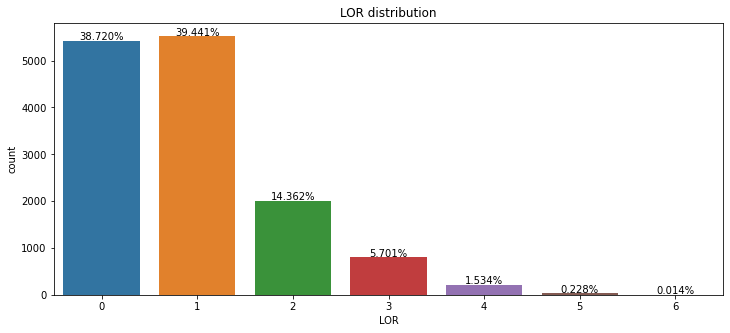

In [25]:
# Distribution
plt.figure(figsize=(12, 5))
ax = sns.countplot(df['LOR'])
plt.title('LOR distribution')
total = len(df['LOR'])
for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")
    
print(" have 7 categories")

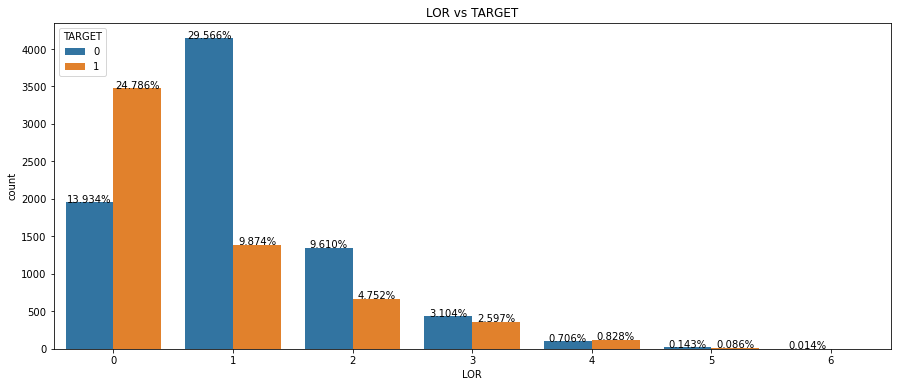

In [26]:
fig = plt.figure(figsize=(15, 6))
ax = sns.countplot(df['LOR'], hue=df['TARGET'])
total = len(df['LOR'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,
            '{:1.3f}%'.format(100*(height/total)), ha="center")

plt.title('LOR vs TARGET')
plt.show()

* # lor_M :
Length of the relationship between the customer and the insurance company in months

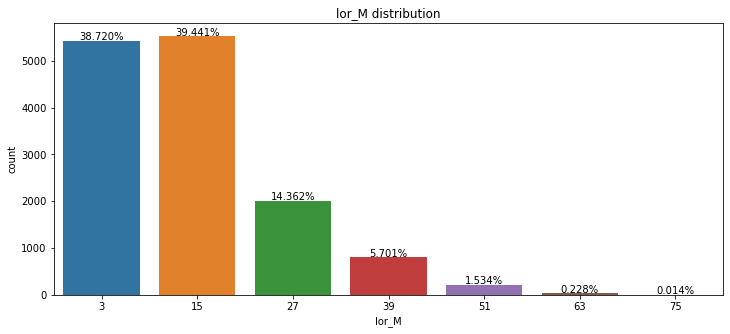

In [27]:
# Distribution
plt.figure(figsize=(12, 5))
ax = sns.countplot(df['lor_M'])
plt.title('lor_M distribution')
total = len(df['lor_M'])
for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")
    

look the same as LOR. Check corelation between them.  
Meybe we can remove it. 

* # prod_A  :
bought product A (0= no, 1=yes)


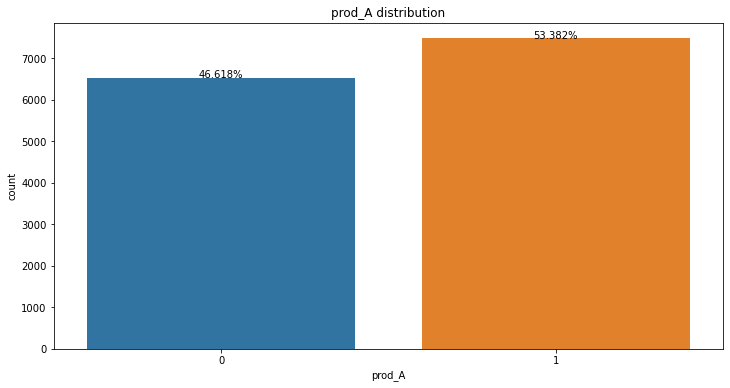

In [28]:

# Distribution
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="prod_A", data=df)
plt.title('prod_A distribution')

total = len(df['prod_A'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

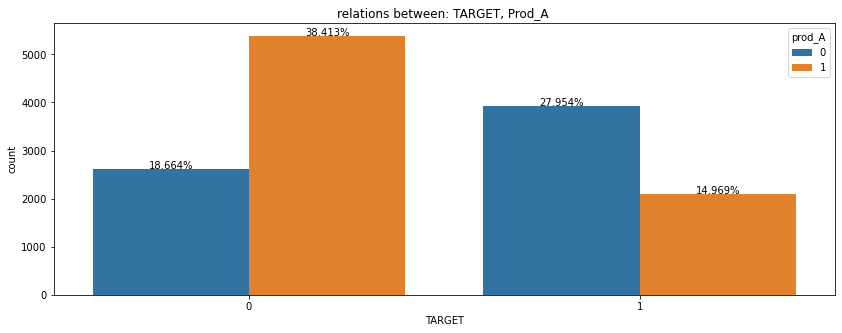

In [29]:
fig = plt.figure(figsize=(14, 5))
ax = sns.countplot(df['TARGET'], hue=df['prod_A'])
total = len(df['TARGET'])
plt.title('relations between: TARGET, Prod_A ')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,
            '{:1.3f}%'.format(100*(height/total)), ha="center")
plt.show()

* We can see that most of customers that not bought product A -  bought the new prodact.
* We can see that most of customers that bought product A -  not bought the new prodact.

* # type_A :
Type of product A

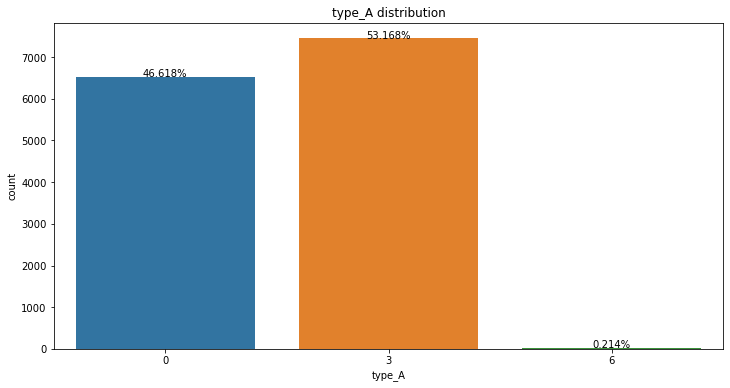

In [30]:
# Distribution
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="type_A", data=df)
plt.title('type_A distribution')

total = len(df['type_A'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

We can see there are 3 types of product A , and most of customers bought type 3 and almost no one bought type 6. 
We will check about the importance of this detail. 

* # prod_B  :
bought product B (0= no, 1=yes)

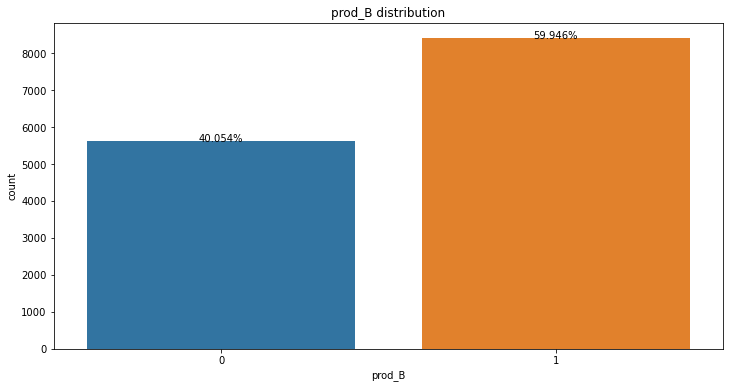

In [31]:
# Distribution
plt.figure(figsize=(12,6))
ax = sns.countplot(x="prod_B", data=df)
plt.title('prod_B distribution')

total = len(df['prod_B'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

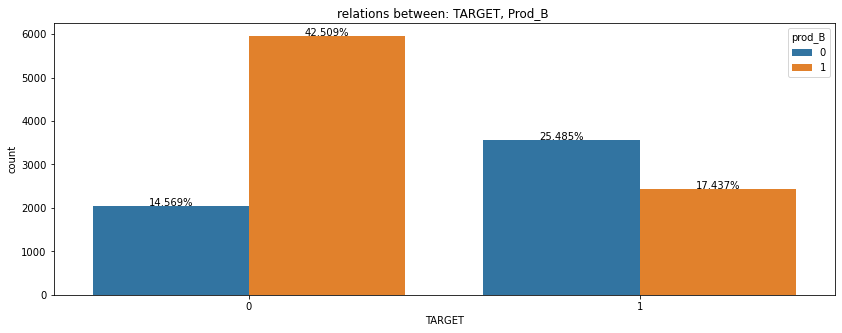

In [32]:
# relations between: TARGET, Prod_B
fig = plt.figure(figsize=(14, 5))
ax = sns.countplot(df['TARGET'], hue=df['prod_B'])
total = len(df['TARGET'])
plt.title('relations between: TARGET, Prod_B ')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,
            '{:1.3f}%'.format(100*(height/total)), ha="center")
plt.show()

* We can see that most of customers that not bought product B -  bought the new prodact
* We can see thar most of customers that bought product B -  not bought the new prodact
* Same situation like product A .  

* # type_B :
Type of product B

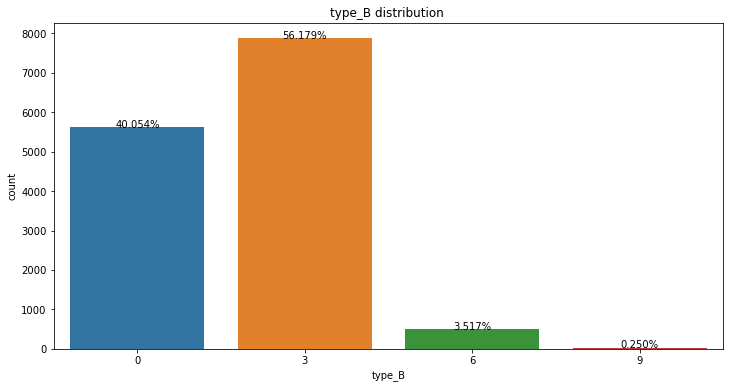

In [33]:
# Distribution
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="type_B", data=df)
plt.title('type_B distribution ')

total = len(df['type_B'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")


We can see there are 4 types of product B , and most of customers bought type 3 and almost no one bought type 6 and 9. 
We will check about the importance of this detail. 

* # Turnover_A :
mount of money spent on product A

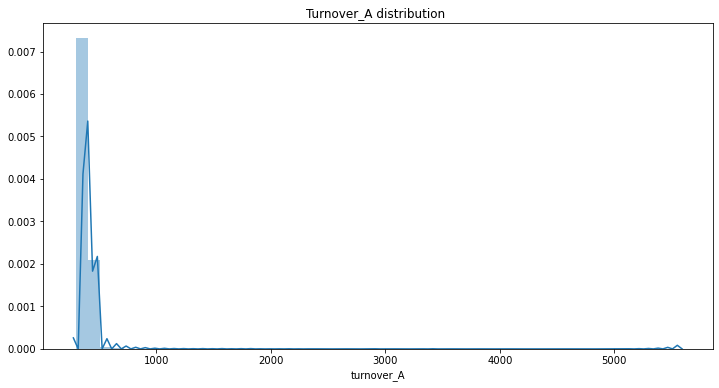

In [34]:

# Distribution
plt.figure(figsize=(12, 6))
plt.title('Turnover_A distribution ')
sns.distplot(df['turnover_A'])



In [35]:
print("common turnover_A value: "+str(df['turnover_A'].mode()[0]))
print("mean turnover_A: "+str(np.round(df['turnover_A'].mean(), decimals=2)))

common turnover_A value: 300.2516225
mean turnover_A: 379.16


* # Turnover_B :
mount of money spent on product B

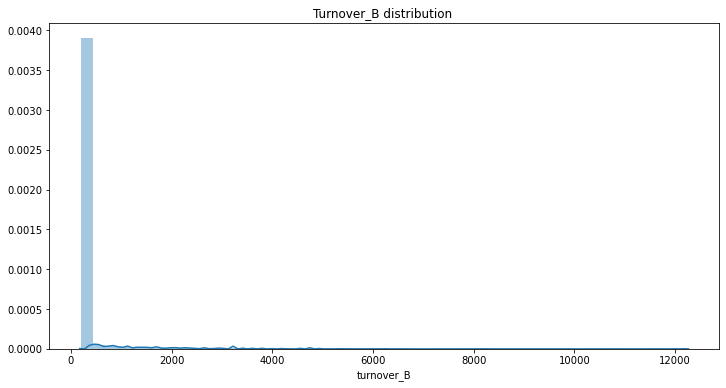

In [36]:

# Distribution
plt.figure(figsize=(12, 6))
plt.title('Turnover_B distribution ')
sns.distplot(df['turnover_B'])
plt.show()


In [37]:
print("common turnover_B value: "+str(df['turnover_B'].mode()[0]))
print("mean turnover_B: "+str(np.round(df['turnover_B'].mean(), decimals=2)))

common turnover_B value: 193.4583447
mean turnover_B: 328.63


* # Contract :
Type of contract

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


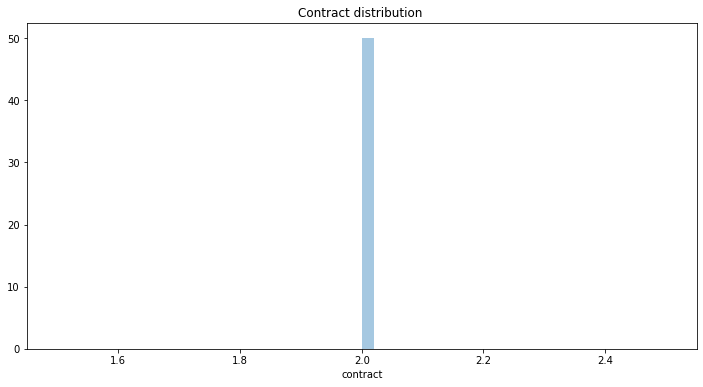

In [38]:
# Distribution
plt.figure(figsize=(12, 6))
plt.title('Contract distribution ')
sns.distplot(df['contract'])
plt.show()

In [39]:
print("df shape : "+str(df.shape))
print("contract values : "+str(df['contract'].value_counts()))

df shape : (14016, 15)
contract values : 2    14016
Name: contract, dtype: int64


 we can see that contract is equals to all samplas. Its not give us more information, so I will probably remove it later

# corelation matrix:
* y = dependent variable (TARGET)
* x = independent variables (all others fitures)


In [40]:
df_x = df.drop('TARGET', axis=1)

In [41]:
df_x.shape

(14016, 14)

check corellation bewtween features (not contain TARGET)

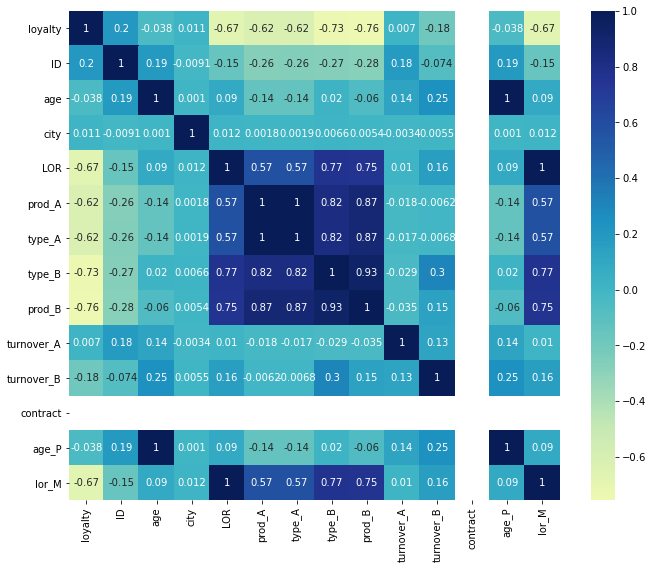

In [42]:
corr_x = (df_x).corr()
plt.figure(figsize=(11, 9))
sns.heatmap(corr_x, vmax=1, annot=True,center=0, cmap='YlGnBu')

check corellation bewtween features and TARGET

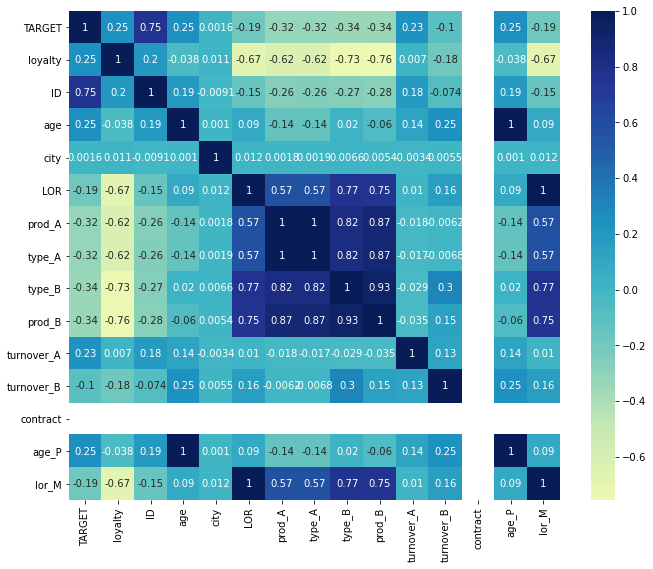

In [43]:
corr = df.corr()
plt.figure(figsize=(11,9))
sns.heatmap(corr, annot=True, vmax=1,center=0, cmap='YlGnBu')

Correlation conclusions: 

- Features with a correlation equal to 1, are unnecessary / double, and we can download them:
        o Age, Age_p
        o LOR, lor_M
        o Prod_A, Type_A
- Contract - is a fixed variable for all records, does not add information to us, and can be remove.
- High correlation features (above 0.80):
        o Type_B and prod_B
        o prod_A / Type_A and prod_B, Type_B

* check the relationship between product A and product B: 

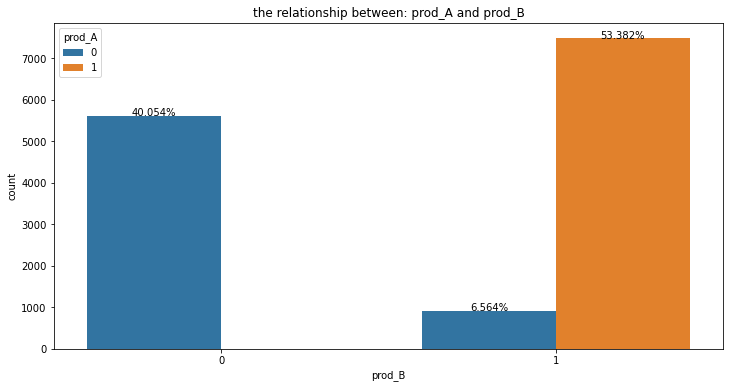

In [44]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="prod_B", data=df, hue=df['prod_A'])
plt.title('the relationship between: prod_A and prod_B')
total = len(df['prod_B'])
for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")
    



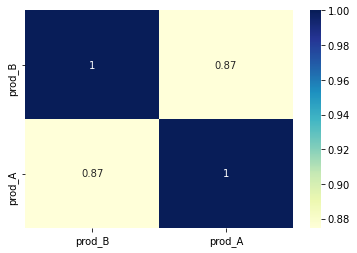

In [45]:
sns.heatmap(df[['prod_B', 'prod_A']].corr(), annot=True, cmap='YlGnBu')

we can see that most customers who bought product A also bought product B. 


# 2.4 Verify data quality

* Check for missing values

In [46]:
#  Missing Value Analysis -Check for missing values
missing_val_df = pd.DataFrame(index = df.keys(), data =df.isnull().sum(), columns = ['missing_vals_count'])
missing_val_df.sort_values('missing_vals_count',ascending= False)

,missing_vals_count
TARGET,0
loyalty,0
ID,0
age,0
city,0
LOR,0
prod_A,0
type_A,0
type_B,0
prod_B,0


**conclusion** : We can see that there are no missing values in our dataset, hence we do not need to perform any data handling process for missing values in our data

* Check duplicate values  

In [47]:
# ID 
df['ID'].value_counts()

df[df['ID'].duplicated() == True]

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
11008,1,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
11009,1,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
11010,1,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
11011,1,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
11012,1,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,1,99,151601,30,2,0,0,0,0,0,386.434278,284.309508,2,30,3
14012,1,1,151634,27,2,2,1,3,3,1,376.842591,266.993794,2,27,27
14013,1,99,151679,26,2,0,0,0,0,0,434.805703,284.629361,2,26,3
14014,1,1,151804,75,2,1,1,3,3,1,366.273857,270.573265,2,75,15


In [48]:
# example : 
df[df['ID'] == 77]

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,1,99,77,66,2,0,0,0,0,0,333.561114,264.72101,2,66,3
11008,1,99,77,66,2,0,0,0,0,0,333.561114,264.72101,2,66,3


In [49]:
# Conclusion: there are 3008 duplicated rows of ID column - thats mean we have 3008 non-real customes

dop= np.round((3008/len(df))*100, decimals=2)
print(str(dop) +'% of the samples have a duplicate ID')

to_drop=[]
to_drop.append('ID')

print('size of df with duplicates: '+ str(df.shape))



21.46% of the samples have a duplicate ID
size of df with duplicates: (14016, 15)


In [50]:
# we dont have time coloumn, so its no matter which duplicate id row I will delete
# delete duplicate ID records
df = df.drop_duplicates(subset=to_drop, keep='first')

print('size of df after drop duplicates: '+ str(df.shape))


size of df after drop duplicates: (11008, 15)


*  check what  if there is a diffrance between age to age_p : (corrlation=1)

In [51]:
# Exaploring unqie values of age column
df['age'].describe()


count    11008.000000
mean        34.845203
std         13.032781
min          5.000000
25%         24.000000
50%         31.000000
75%         42.000000
max        102.000000
Name: age, dtype: float64

In [52]:
# Exaploring unqie values of age column
df['age_P'].describe()


count    11008.000000
mean        34.845203
std         13.032781
min          5.000000
25%         24.000000
50%         31.000000
75%         42.000000
max        102.000000
Name: age_P, dtype: float64

same values- we can remove age_p

# step 3- Data Preparation

We will decide what data and witch features we will use in the model. 
That is, we prepare the final set of values for the model.
* Data selection
* Clearing the data
* Feature engineering
* Feature selection 
* Reducing the order of the data 


• Feature engineering

In [53]:
# convert to category :
# df['ID'].describe()

ID_category= pd.cut(df['ID'],bins=[0,7500,15000,2000000],labels=['old','avarage','new'])
ID_category.value_counts()

df.insert(2,'ID_category',ID_category)
df = df.drop('ID', axis=1)

In [54]:
df.dtypes
# df['ID_category'].count_val()

TARGET            int64
loyalty           int64
ID_category    category
age               int64
city              int64
LOR               int64
prod_A            int64
type_A            int64
type_B            int64
prod_B            int64
turnover_A      float64
turnover_B      float64
contract          int64
age_P             int64
lor_M             int64
dtype: object

In [55]:
df=pd.get_dummies(df,columns=["ID_category"])
df.dtypes
df.head()

,TARGET,loyalty,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M,ID_category_old,ID_category_avarage,ID_category_new
0,1,99,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3,1,0,0
1,1,1,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39,1,0,0
2,1,1,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27,1,0,0
3,1,99,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3,1,0,0
4,1,99,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3,1,0,0


* Cleaning data

In [56]:
# remove irrelevant features

# 1 . age , age_P - corr =1
df.shape
df = df.drop('age_P', axis=1)
# 2. LOR , lor_M - corr =1 .
# I deccide to remove lor_M and continue with LOR because it has lower values, that will be better for model.
df = df.drop('lor_M', axis=1)
# 3. prod_A , type_A : corr =1 .
# I deccide to remove type_A and continue with prod_A because it has binary value, that will be better for model.
df = df.drop('type_A', axis=1)
# 4. prod_B , type_B : corr =0.93 .
# I deccide to remove type_B and continue with prod_B because it has binary value, that will be better for model And they have almost the same distribution
df = df.drop('type_B', axis=1)

# we saw contract is equals to all samples, so its not bring us value. Idecised to remove it.
df = df.drop('contract', axis=1)


print(df.shape)
df.dtypes


(11008, 12)


TARGET                   int64
loyalty                  int64
age                      int64
city                     int64
LOR                      int64
prod_A                   int64
prod_B                   int64
turnover_A             float64
turnover_B             float64
ID_category_old          uint8
ID_category_avarage      uint8
ID_category_new          uint8
dtype: object

In [57]:
print(df.shape)
df.dtypes

(11008, 12)


TARGET                   int64
loyalty                  int64
age                      int64
city                     int64
LOR                      int64
prod_A                   int64
prod_B                   int64
turnover_A             float64
turnover_B             float64
ID_category_old          uint8
ID_category_avarage      uint8
ID_category_new          uint8
dtype: object

* Removal noisy data

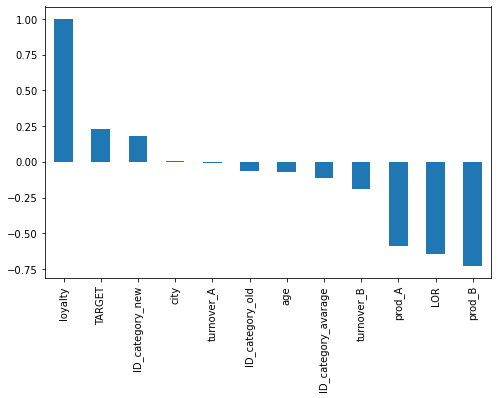

In [58]:
# loyalty - we saw thre are almost 50% ammples are unclassified (99). we will check if loyalty have hight correlation with another fiture, so we can replace it. 

# check correlation of loyalty
plt.figure(figsize=(8, 5))
cm = df.corr()
cm.nlargest(14, 'loyalty')['loyalty'].plot(kind='bar')

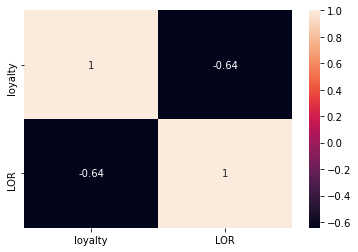

In [59]:
# we can see it have high negatove correlation with : prod_B , LOR . need to check it
# for LOR 
sns.heatmap((df[['loyalty', 'LOR']]).corr(), annot=True)
classified_loyalty = df[df['loyalty'] < 99]

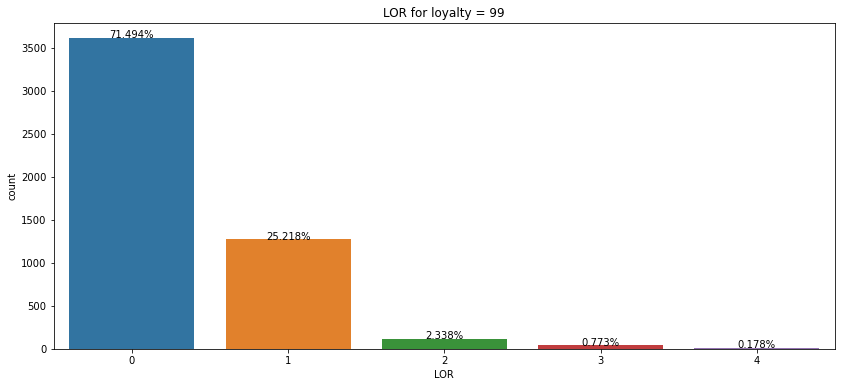

In [60]:
# relation between loyalty and LOR 
unclassified_loyalty = df[df['loyalty'] == 99]
plt.figure(figsize=(14, 6))
ax = sns.countplot(x="LOR", data=unclassified_loyalty)
plt.title('LOR for loyalty = 99')

total = len(unclassified_loyalty['LOR'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

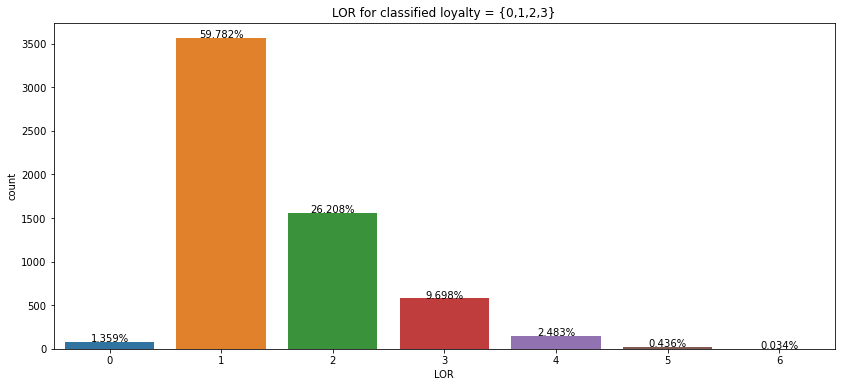

In [61]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(x="LOR", data=classified_loyalty)
plt.title('LOR for classified loyalty = {0,1,2,3}')

total = len(classified_loyalty['LOR'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

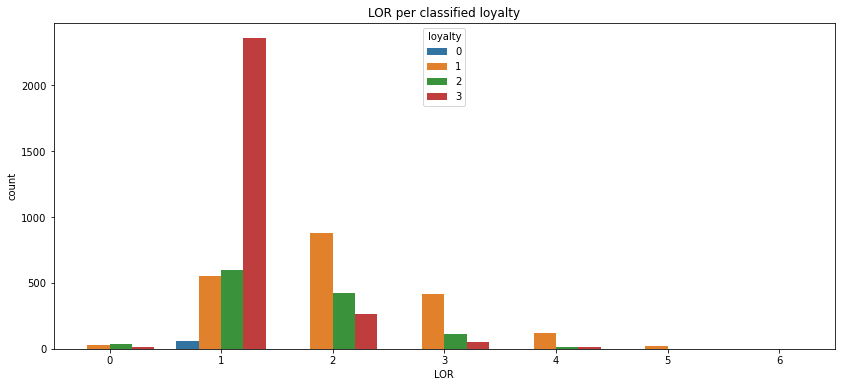

In [62]:

plt.figure(figsize=(14, 6))
ax = sns.countplot(x='LOR', hue='loyalty',data=classified_loyalty)
plt.title('LOR per classified loyalty')
plt.show()

On the one hand, we can see that most of loyalty=99 samples equal to LOR=0.
On the other hand, there are no LOR=0 for the classified and therfore we cant impute based on it.

check prod_B. 

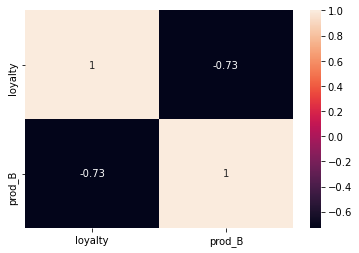

In [63]:
# for prod_B
sns.heatmap((df[['loyalty', 'prod_B']]).corr(), annot=True)


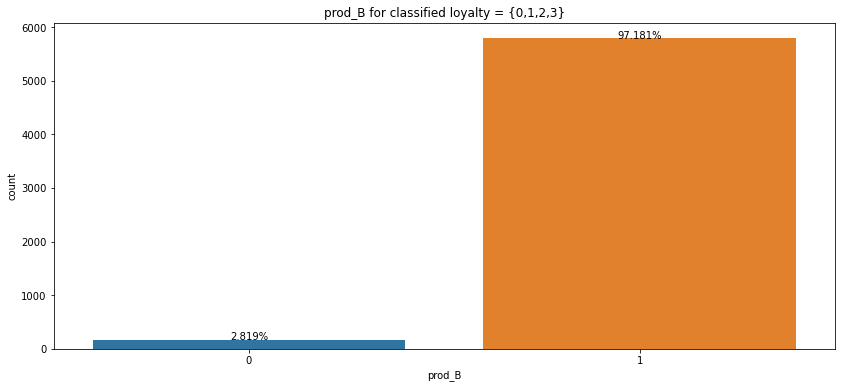

In [64]:
classified_loyalty = df[df['loyalty'] < 99]
plt.figure(figsize=(14, 6))
ax = sns.countplot(x="prod_B", data=classified_loyalty)
plt.title('prod_B for classified loyalty = {0,1,2,3}')

total = len(classified_loyalty['prod_B'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

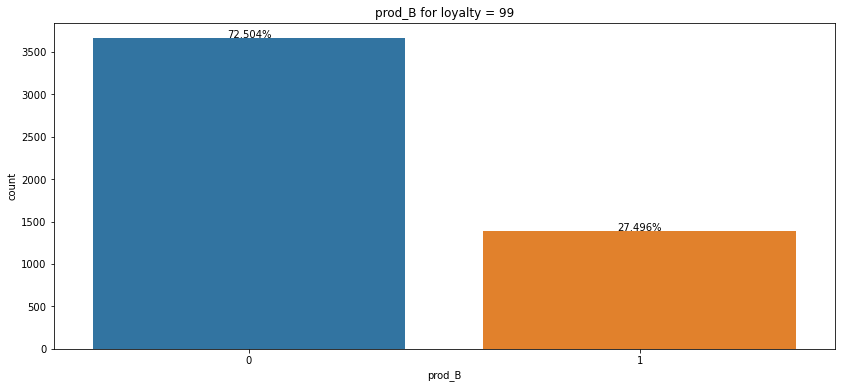

In [65]:
unclassified_loyalty = df[df['loyalty'] == 99]
plt.figure(figsize=(14, 6))
ax = sns.countplot(x="prod_B", data=unclassified_loyalty)
plt.title('prod_B for loyalty = 99')

total = len(unclassified_loyalty['prod_B'])

for p in ax.patches:
    height = p.get_height()

    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")


We can see that when feature prod_B=0, the loyalty is most equal to 99,(unclassified). So, that is no imputation possible via prod_B.
I think taht the high correlation between "prod_B" and "loyalty" connected to the fact that 70% unclassified loyality samples are LOR=0, and that is they mainly the people who not buy prod_B.

In this case I decied to remove loyalty fiture. There are to many samplals equals to 99' means they are unclassified and there are not satisfied imputation.



In [66]:
df = df.drop('loyalty', axis=1)

In [67]:
# city : 
# we saw most of city values is : 
print("percentage of city=2 : "+ str("%.2f" % city_2_prec)+"%")

percentage of city=2 : 97.89%


that means city is almost a constant feature.
anothr problem - is the value : -999999 , makes the mean value negative. 
so I decided delete it. 

In [68]:

df.shape
df = df.drop('city', axis=1)


* Feature selection

In [69]:
# curr feature - most informative features: 
print(df.shape)
df.dtypes

(11008, 10)


TARGET                   int64
age                      int64
LOR                      int64
prod_A                   int64
prod_B                   int64
turnover_A             float64
turnover_B             float64
ID_category_old          uint8
ID_category_avarage      uint8
ID_category_new          uint8
dtype: object

# step 4+5- Modeling & Evaluation 

* Model selection
* Split the data to train and test 
* Training the model on the training set
* Running the model on the test set
* Checking the quality of the model


In [70]:
df.dtypes

TARGET                   int64
age                      int64
LOR                      int64
prod_A                   int64
prod_B                   int64
turnover_A             float64
turnover_B             float64
ID_category_old          uint8
ID_category_avarage      uint8
ID_category_new          uint8
dtype: object

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


* Train Test Split

In [72]:
# division to train set and test set

x, y = df.drop('TARGET', axis=1), df['TARGET'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101, stratify=y, shuffle=True, test_size=.3)

print('Number of records:',df.shape[0])
print()
print('Number of training records:', len(x_train))
calc=x_train.shape[0] / len(y)
print('Training proportions: '+str("%.2f" %calc) +"%") 
print()

print('Number of test records:', len(x_test))
calc=x_test.shape[0] / len(y)
print('Training proportions:'+str("%.2f" %calc) +"%")


Number of records: 11008

Number of training records: 7705
Training proportions: 0.70%

Number of test records: 3303
Training proportions:0.30%


*  model 1 - Logistic regression

In [73]:
# Creating and training a logistic regression model
logisticRegr  = LogisticRegression()
logisticRegr.fit(x_train, y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [74]:
# Predictions and Evaluations: 

# TP -times the model predicts correctly that a customer will buy TARGET
# FP -times the model predicts icorrectly that a customer will buy TARGET
# FN -times the model predicts incorrectly that a customer won't buy TARGET, while he did buy it
# TN -times the model predicts correctly that a customer does not buy TARGET

# Model performance on train dataset
training_predictions = logisticRegr.predict(x_train)
print(classification_report(y_train, training_predictions))
print("--------------------------")


acc = accuracy_score(y_train, training_predictions)
print(f'Accuracy score: {acc:.3f}')






              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5600
           1       0.83      0.86      0.84      2105

    accuracy                           0.91      7705
   macro avg       0.89      0.90      0.89      7705
weighted avg       0.91      0.91      0.91      7705

--------------------------
Accuracy score: 0.914


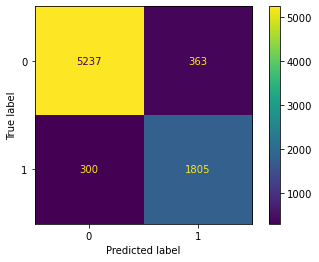

In [75]:
# confusion_matrix
plot_confusion_matrix(logisticRegr,x_train, y_train)

In [76]:
# Model performance on test dataset
test_predictions = logisticRegr.predict(x_test)
print(classification_report(y_test, test_predictions))
print("-------------")


acc = accuracy_score(y_test, test_predictions)
print(f'Accuracy score: {acc:.3f}')


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2400
           1       0.84      0.84      0.84       903

    accuracy                           0.91      3303
   macro avg       0.89      0.89      0.89      3303
weighted avg       0.91      0.91      0.91      3303

-------------
Accuracy score: 0.913


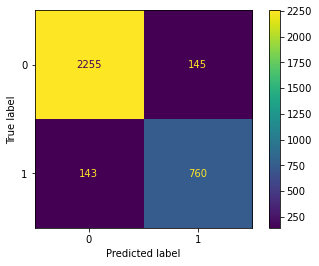

In [77]:
plot_confusion_matrix(logisticRegr, x_test, y_test)

* model 2 - Decision tree

In [78]:
clf = DecisionTreeClassifier()
clf_train = clf.fit(x_train, y_train)


prediction = clf_train.predict(x_test)

report = classification_report(y_test, prediction)
print(report)

print("----------------------")
acc = accuracy_score(y_test, prediction)
print(f'Accuracy score: {acc:.3f}')


# plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Blues)  
# plt.show() 




              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2400
           1       0.85      0.83      0.84       903

    accuracy                           0.91      3303
   macro avg       0.89      0.89      0.89      3303
weighted avg       0.91      0.91      0.91      3303

----------------------
Accuracy score: 0.913


In [79]:
# change max_depth and try again

clf = DecisionTreeClassifier(max_depth=7)
clf_train = clf.fit(x_train, y_train)
prediction = clf_train.predict(x_test)
prediction
acc = accuracy_score(y_test, prediction)
print(f'Accuracy score, max depth =7:   {acc:.3f}')

clf = DecisionTreeClassifier(max_depth=20)
clf_train = clf.fit(x_train, y_train)
prediction = clf_train.predict(x_test)
prediction
acc = accuracy_score(y_test, prediction)
print(f'Accuracy score, max depth =20:  {acc:.3f}')



# we can see that changing the max_depth reduces the accuracy slitly, the accuracy score are still very high.

Accuracy score, max depth =7:   0.936
Accuracy score, max depth =20:  0.914


In [80]:
clf = DecisionTreeClassifier(max_features=5)
clf_train = clf.fit(x_train, y_train)
prediction = clf_train.predict(x_test)
prediction

report = classification_report(y_test, prediction)
print(report)

acc = accuracy_score(y_test, prediction)
print(f'Accuracy score: {acc:.3f}')

#we tried playing with multiple features to raise the acuuracy score,but the accuracy increase only a bit
# so we try another way 

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2400
           1       0.86      0.84      0.85       903

    accuracy                           0.92      3303
   macro avg       0.90      0.89      0.90      3303
weighted avg       0.92      0.92      0.92      3303

Accuracy score: 0.918


* model 3- use Random Forest

In [81]:

rf = RandomForestClassifier( n_estimators=100 ,random_state = 12,  max_depth=7)
rf.fit(x_train,y_train)


# train set ditailes :

print ("train:")
training_predictions = rf.predict(x_train)
print(classification_report(y_train, training_predictions))
print ("===============")

# test st : 
test_predictions = rf.predict(x_test)

print ("test:")
print(classification_report(y_test, test_predictions))

# Predictions and Evaluations: 
# accurecy_score
print(f'Accuracy score: {accuracy_score(y_test, test_predictions):.3f}')
print("confusion_matrix:")
print(confusion_matrix(y_test, test_predictions))



train:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5600
           1       0.92      0.91      0.92      2105

    accuracy                           0.95      7705
   macro avg       0.94      0.94      0.94      7705
weighted avg       0.95      0.95      0.95      7705

test:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2400
           1       0.89      0.88      0.89       903

    accuracy                           0.94      3303
   macro avg       0.92      0.92      0.92      3303
weighted avg       0.94      0.94      0.94      3303

Accuracy score: 0.939
confusion_matrix:
[[2304   96]
 [ 107  796]]

use cross_val_score:
AUC scores computed using 5-fold cross-validation: [0.98509438 0.97711786 0.96689687 0.97888889 0.97863426]
AUC scores computed using 5-fold cross-validation:0.977


Summary: 
		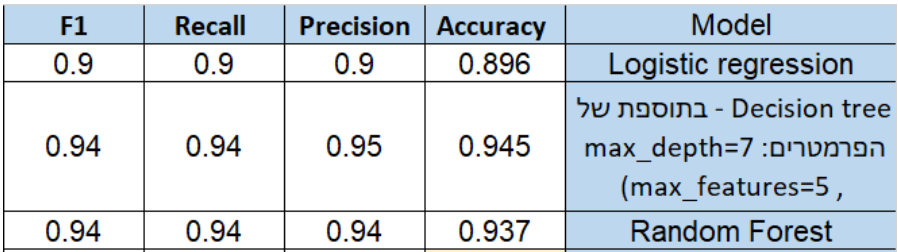


* conclusion- the model: Decision tree (with parameters)- bring us the best accuracy results

# step 6 - Deployment 
The deployment phase includes four tasks. These are:
* Planning deployment (your methods for integrating data-mining discoveries into use)
* Planning monitoring and maintenance
* Reporting final results
* Reviewing final results

Everything is detailed in the report.